# Ch 4 - Inferential Statistics 

We wish to infer parameters of, and draw conclusions about a population using a statistic (number/property describing a characteristic of a sample).  

Goal for this module:
* Understanding sampling distributions
* Method 1: Point estimates
* Method 2: Confidence intervals
* Method 3: Hypothesis testing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl 
%matplotlib inline 


## Populations 

* Two kinds of distributions: populations and samples 
* A population is the set of all relevant measurements.  Think of it as the big picture. 



### Population: Finite or Infinite? 

A population can have a finite number of outcomes, but an infinite extent. 

**Example**  Consider the set of all possible two-dice throws:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12].  

We can ask what the distribution across the totals would be if you threw a pair of dice an infinite number of times. 

--- 

Alternatively, a population can also have an infinite number of outcomes and an infinite extent. 

**Example** Consider a simulation that produces a predicted global average temperature for 2050.  

The simulation won't give the same result every time it is run:  15.17, 14.81, 15.02, 14.46, ... 

We can ask how the values would be distributed across an infinite number of runs of the simulation, each linked to a different sequence of pseudo-random numbers. 

--- 

A population can be finite but large. 

* The set of all fish in the Pacific Ocean 
* The set of all people currently living in the US 

A population can be finite and small. 

* The set of Nobel prize winners born in Hungary. 



### Known Population Distributions 

Many times our knowledge of probability allows us to specify exactly what the infinite long-run distribution of some process looks like.  

We can illustrate this with a probability density function, e.g., a histogram that describes the probability of an outcome rather than counting occurances of that outcome. 

For the case of totals of two dice. 

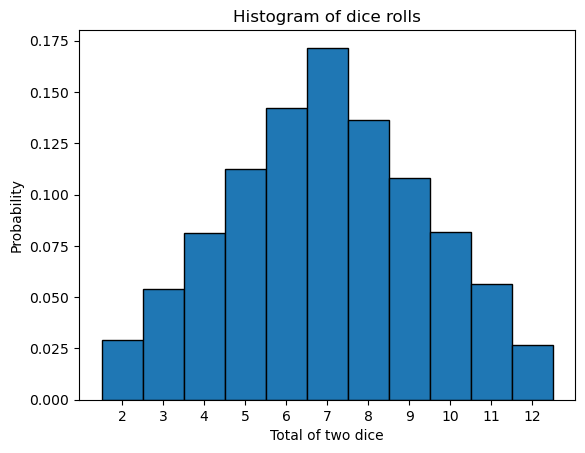

In [2]:
rng = np.random.default_rng(2022)
n = 10000
obs1 = rng.choice(range(1,7), n)
obs2 = rng.choice(range(1,7), n)
tot = obs1 + obs2 
plt.hist(tot, bins=[2,3,4,5,6,7,8,9,10,11,12,13], 
         align='left', edgecolor='black', density=True)
plt.xticks(range(2,13));
plt.title('Histogram of dice rolls')
plt.xlabel('Total of two dice')
plt.ylabel('Probability');

#### The need for sampling 

More commonly, we don't know the precise shape of the population's distribution on some variable.  But we'd *like* to know. 

We have no alternative but to **sample** the population in some way.  

This may mean an empirical sampling.  For example, we go out into the middle of the Pacific Ocean and catch 100 fish in order to learn about the distribution of fish weights. Or, it may mean sampling from many repeated runs of a simulation. 

## Samples 

A sample is just a group of observations drawn in some way from a wider population.  

Statistics has its roots in the effort to figure out just what you can reasonably infer about this wider population from the sample you've got. 

The *size* of your sample turns out to be an important limiting factor. 

### Sampling from a known distribution 

Let's examine a simple distribution to understand the effects of sampling.  

Our distribution is the results from throwing a single die, that is, the uniform distribution across the integers 1 to 6 inclusive. 

We know that the mean of the distribution is 3.5000, the variance is 2.917, and the standard deviation is 1.708. 

$$ Mean = (1 + 2 + 3+ 4 + 5 + 6) / 6 = 3.5 $$

$$ Variance = ((1-3.5)^2 + (2 - 3.5)^2 + ... (6-3.5)^2) / 6 = 2.917$$

$$ Std. Dev. = \sqrt{Variance} = 1.708$$

We can simulate drawing some samples from this distribution to see how the size of our sample affects our attempts to draw conclusions about the population.  

First, we create a large sample $n$ = 50000 which will approach the uniform distribution. 

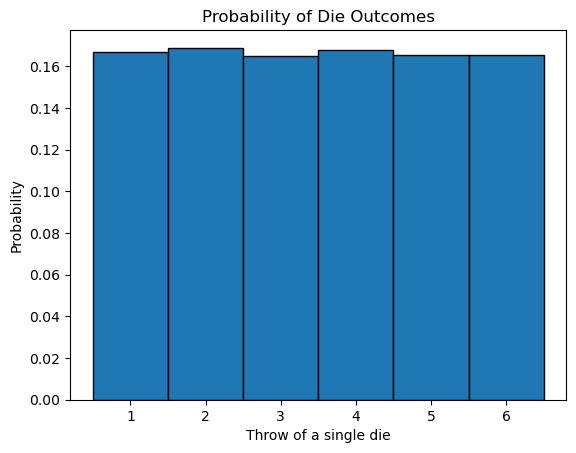

In [3]:
n = 50000
obs = rng.choice(range(1,7), n)
plt.hist(obs, bins=[1,2,3,4,5,6,7], 
         align='left', edgecolor='black', density=True)
plt.xticks(range(1,7));
plt.title('Probability of Die Outcomes')
plt.xlabel('Throw of a single die')
plt.ylabel('Probability');

Let's look at two small samples, one with $n$ = 3 and one with $n$ = 25. 

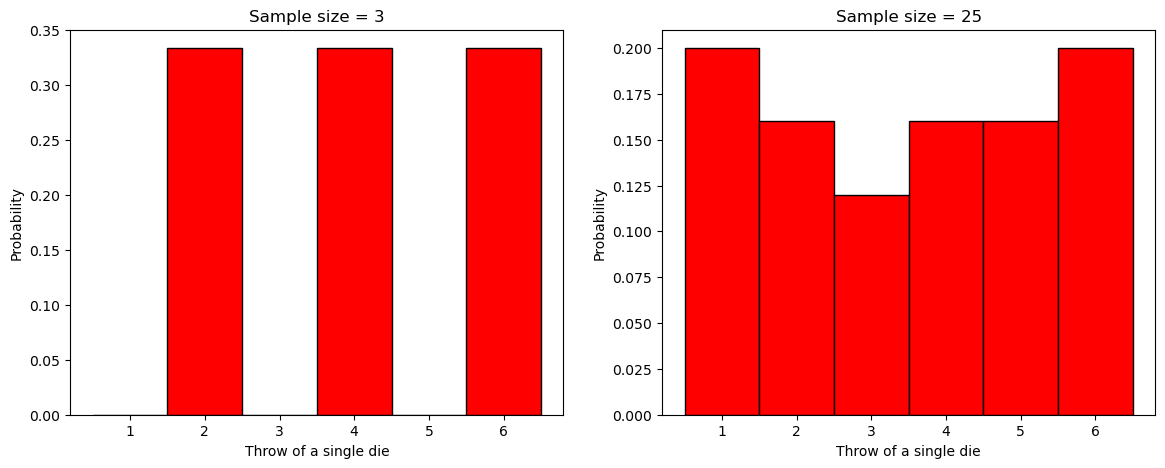

In [4]:
n1 = 3
n2 = 25
obs1 = rng.choice(range(1,7), n1)
obs2 = rng.choice(range(1,7), n2)
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(obs1, bins=[1,2,3,4,5,6,7], color='red',
         align='left', edgecolor='black', density=True)
plt.xticks(range(1,7));
plt.xlabel('Throw of a single die')
plt.ylabel('Probability');
plt.title('Sample size = 3')
plt.subplot(1,2,2)
plt.hist(obs2, bins=[1,2,3,4,5,6,7], color='red',
         align='left', edgecolor='black', density=True)
plt.xticks(range(1,7));
plt.xlabel('Throw of a single die')
plt.ylabel('Probability');
plt.title('Sample size = 25');

In [5]:
print("Mean of sample with  3 obs: %.3f" % obs1.mean())
print("Mean of sample with 25 obs: %.3f" % obs2.mean())

Mean of sample with  3 obs: 4.000
Mean of sample with 25 obs: 3.520


In both cases, we didn't reproduce the shape of the true distribution, but get close to 3.5 as the mean. 

The larger sample gave us a more accurate estimate of the population mean.  *Hopefully, not too suprising* 

### Sampling Distribution of the Mean

Let's simulate drawing a size 3 sample 10,000 time, calculate the sample mean, and see what this distribution looks like. 

In [6]:
N_tests = 10000
n = 3
means = [0] * N_tests
for i in range(N_tests):
    obs = rng.choice(range(1,7), n)
    means[i] = obs.mean()
    # print ("Sample " + str(i) + ", Mean: ", '%.2f' % means[i])
print("Mean of Sample Means: %.3f" % np.mean(means))

Mean of Sample Means: 3.485


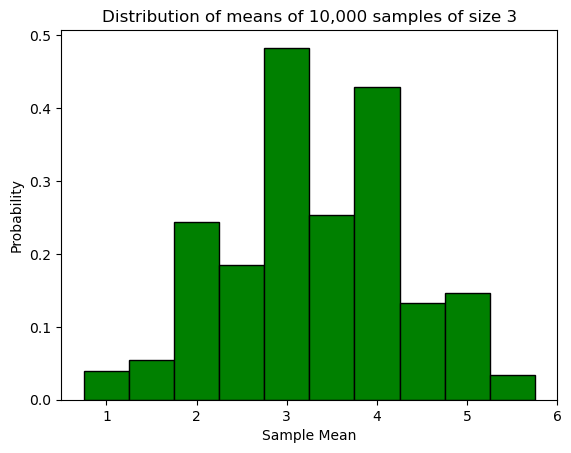

In [7]:
plt.hist(means, color='green',
         align='left', edgecolor='black', density=True)
plt.xticks(range(1,7));
plt.xlabel('Sample Mean')
plt.ylabel('Probability');
plt.title('Distribution of means of 10,000 samples of size 3');

For sample size 3, it looks like the *mean of the sample means* is close to the true mean of 3.5. 

But there is a lot of variation.  With such a small sample size, we can get extreme results such as a sample mean of 1 or 6 reasonably often. 

Do things improve if we look at the distribution of the sample means of sample size 25? 

In [8]:
N_tests = 10000
n = 25
means = [0] * N_tests
for i in range(N_tests):
    obs = rng.choice(range(1,7), n)
    means[i] = obs.mean()
    # print ("Sample " + str(i) + ", Mean: ", '%.2f' % means[i])
print("Mean of Sample Means: %.3f" % np.mean(means))

Mean of Sample Means: 3.498


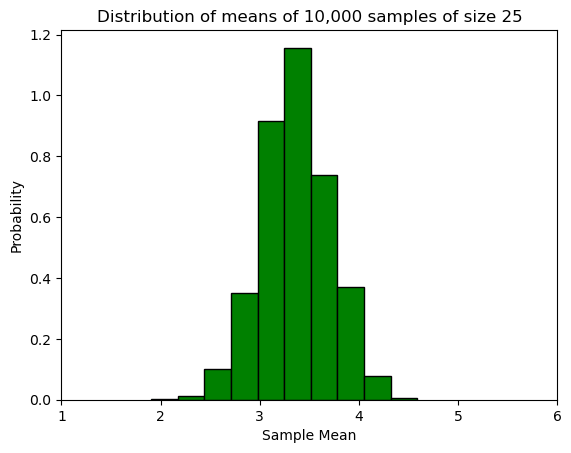

In [9]:
plt.hist(means, color='green',
         align='left', edgecolor='black', density=True)
plt.xticks(range(1,7));
plt.xlabel('Sample Mean')
plt.ylabel('Probability');
plt.title('Distribution of means of 10,000 samples of size 25');

What about distribution of the sample means of sample size 100? 

In [10]:
N_tests = 10000
n = 100
means = [0] * N_tests
for i in range(N_tests):
    obs = rng.choice(range(1,7), n)
    means[i] = obs.mean()
    # print ("Sample " + str(i) + ", Mean: ", '%.2f' % means[i])
print("Mean of Sample Means: %.3f" % np.mean(means))

Mean of Sample Means: 3.498


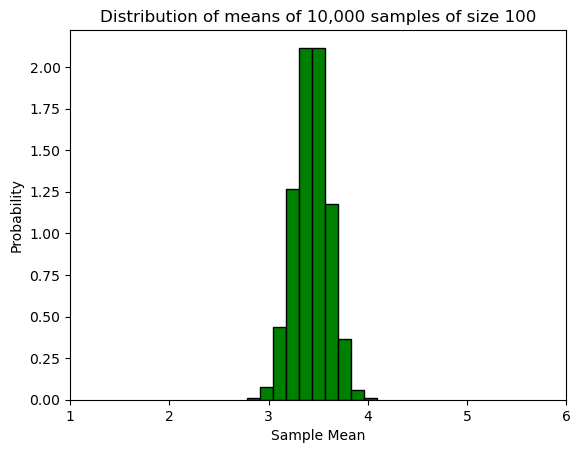

In [11]:
plt.hist(means, color='green',
         align='left', edgecolor='black', density=True)
plt.xticks(range(1,7));
plt.xlabel('Sample Mean')
plt.ylabel('Probability');
plt.title('Distribution of means of 10,000 samples of size 100');

What do we see from these figures? 

* The distribution of the sample means looks like it is shaped like a bell curve, despite the fact that we've been sampling from a uniform distribution 

* The width of the bell curve is getting gradually smaller as the size of our samples increases.  So bigger samples seem to give tighter, more accurate estimates. 

* Even for really small sample sizes, like 3, the sample mean distribution looks like it is *centered* on the true mean, but for a particular sample we could be way off. 

What do we know? 

* The mean of our sample means will converge on the true mean. 

* The standard deviation of our distribution of *sample means* will tighten up in proportion to $\frac{1}{\sqrt{N}}$.  In other words, accuracy improves with bigger sample sizes, but with diminishing returns.  This $\frac{1}{\sqrt{N}}$ ratio is related to the *standard error*. 

## Samples vs. Populations: Red Wine Example

Lets return to the red wine quality data set, and try to better understand samples versus population.  There are two different viewpoints, both valid:
* We have only *sampled* some of red wines produced in Northern Portugal.  Hence, the data set we have is a *sample*, which we can use to infer characteristics about red wines produced in Portugal.
* We can think of our data set as the population, e.g., the data covers all the varieties of red wines produced at wineries in Portugal in a certain month.  

We shall take the latter interpretation for the rest of the lecture. Lets begin by importing our data set as before.

In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url, sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We learned how to find the mean pH of the wine last week.  

Let's call this the population mean, $\mu$

In [13]:
mu = wine["pH"].mean()
print("mean pH, mu = ", str(mu))

mean pH, mu =  3.3111131957473416


Perhaps, someone did not believe that red wine was so acidic, and demanded that we re-measure the pH of the wines.  This might be ridiculously time consuming/expensive, and we don't want to take the time to sample all 1599 red wines again.  

Instead, what we want to do is take a few random samples of the wine, and convince the appropriate party that the reported mean pH was reasonable.  How do we do that?  How do we quantify our confidence in the reported pH? To do this, we first need to understand how meaningful it is to take the mean of samples.  A key concept is *the sampling distribution of the sample mean*.

Suppose that our initial measurements were actually accurate (i.e., if we measured the same wine again, the reported pH will be the same value.  Suppose we were only interested in re-measuring the mean pH of $n=30$ wines.  If we drew all possible samples of size $n=30$, measured the mean of each sample, then the probability distribution of this mean is called the *mean sampling distribution*.  For this example, there are a total of $1588 choose 30$ samples. This is a very large number of samples.  We can instead approximate the mean sampling distribution by drawing a large number of samples of size $n=30$, say 1000.

In [14]:
N_tests = 1000
n = 30
means = [0] * N_tests

Let's set up this testing, the last command above generates list with $N_{test}$ elements, each element initialized to 0.  Let's now generate each sample and store the mean of the sample in the new list. 

In [15]:
for i in range(N_tests):
    obs = np.random.choice(wine.index.values, n)
    sample_wines = wine.loc[obs]
    means[i] = sample_wines["pH"].mean()
    print ("Sample " + str(i) + ", Mean: ", '%.2f' % means[i])

Sample 0, Mean:  3.28
Sample 1, Mean:  3.32
Sample 2, Mean:  3.33
Sample 3, Mean:  3.28
Sample 4, Mean:  3.33
Sample 5, Mean:  3.27
Sample 6, Mean:  3.33
Sample 7, Mean:  3.24
Sample 8, Mean:  3.31
Sample 9, Mean:  3.34
Sample 10, Mean:  3.31
Sample 11, Mean:  3.34
Sample 12, Mean:  3.28
Sample 13, Mean:  3.29
Sample 14, Mean:  3.29
Sample 15, Mean:  3.27
Sample 16, Mean:  3.34
Sample 17, Mean:  3.34
Sample 18, Mean:  3.29
Sample 19, Mean:  3.29
Sample 20, Mean:  3.27
Sample 21, Mean:  3.30
Sample 22, Mean:  3.38
Sample 23, Mean:  3.30
Sample 24, Mean:  3.31
Sample 25, Mean:  3.39
Sample 26, Mean:  3.33
Sample 27, Mean:  3.34
Sample 28, Mean:  3.29
Sample 29, Mean:  3.28
Sample 30, Mean:  3.28
Sample 31, Mean:  3.29
Sample 32, Mean:  3.30
Sample 33, Mean:  3.28
Sample 34, Mean:  3.32
Sample 35, Mean:  3.34
Sample 36, Mean:  3.36
Sample 37, Mean:  3.27
Sample 38, Mean:  3.34
Sample 39, Mean:  3.32
Sample 40, Mean:  3.34
Sample 41, Mean:  3.31
Sample 42, Mean:  3.32
Sample 43, Mean:  3.2

Now, we can generate a histogram of the means. 

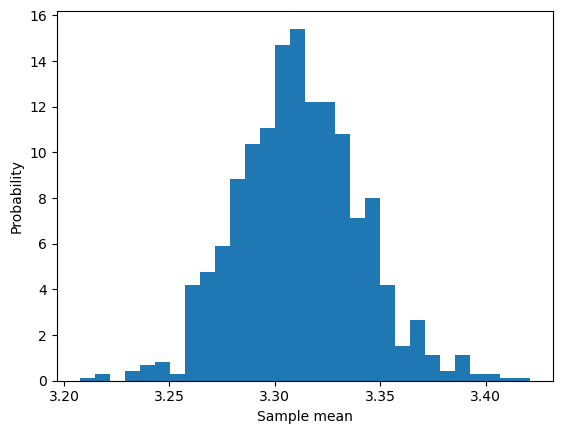

In [16]:
nbins = 30
_ = plt.hist(means, nbins, density=True)
plt.ylabel('Probability')
plt.xlabel('Sample mean');

In [17]:
print('Mean of the Sample Means: %.3f' % np.mean(means))

Mean of the Sample Means: 3.312


### Central Limit Theorem 

The *central limit theorem* tells us that we reliably get a normal distribution when we look at the distribution of sample mens, no matter what the original distribution that we were sampling from. 

Let's fit a normal distribution to this plot.

In [18]:
from scipy.stats import norm
xbar, s = norm.fit(means)
print("mean = %g, standard deviation of distribution = %g"%(xbar, s))

mean = 3.31153, standard deviation of distribution = 0.0294414


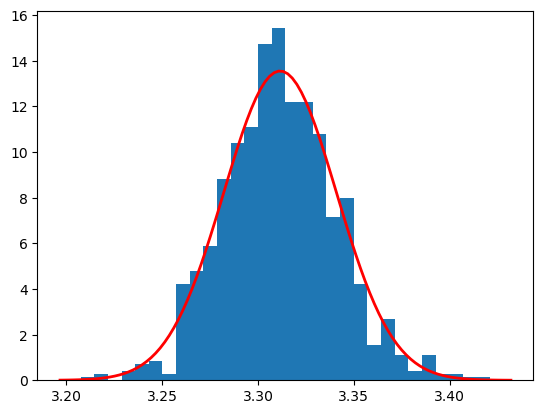

In [19]:
_ = plt.hist(means, bins=nbins, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = norm.pdf(x, xbar, s)
_ = plt.plot(x, p, 'r', linewidth=2)

So, our sampling distribution is well approximated by the Gaussian (normal) distribution.  Lets review some properties of the normal distribution:
* the distribution is symmetric about it's mean;
* there is a single peak, mean = median = mode (most frequently occurring value in series), located at $x = \mu$;
* the distribution has inflection points at $\mu \pm \sigma$, where $\sigma$ is the standard deviation;
* The area under the distribution is 1;
* The area under the curve to the left (right) of $\mu$ is 0.5;
* The curve approaches, but never reaches the horizontal axis.

We already saw this last week, the normal distribution can be described mathematically by
$$ N(\mu,\sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2} \right).$$
Often, we standardize normal data by computing z-scores, so that any Normal curve $N(\mu,\sigma^2)$ can be transformed into the standard normal curve $N(0,1)$,
$$z = \frac{x-\mu}{\sigma}.$$

## The Normal Distribution 

The normal distribution is central to statistical inference.  

A particular normal distribution is fully characterized by just two parameters: the mean, $\mu$, and the standard deviation, $\sigma$ 

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/week3/normal-distribution.png" width="750px">

The normal distribution's consistent shape is useful because we can say precise things about areas under the curve. 

It's a probablity distribution so the area sums to 1 (or 100%). 

* 68% of the time the variate will be within plus or minus one standard deviation of the mean (i.e., a z-score between -1 and 1) 
* 95% of variates will be within two standard deviations. 
* 99.7% of variates will be within three standard deviations. 

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/week3/standard-deviation.png" width="750px">

### Example of Normal Variates 

Suppose we have a normal distribution with a mean of 100 and a standard deviation of 10.  We can reason about values. 

* Only 0.1% of cases will have a score higher than 130.  
* About 95% of cases will lie between 80 and 120.  
* About 34% of cases will be between 100 and 110.  

More on this later ...

## Method 1: Point Estimates 

We are now ready to describe Method 1: using sample data to give a point estimate (best guess) of the population parameters.  The idea is to take a sample of the population, e.g. $n=30$ wines, and compute the mean of the sample, $\bar{x}$.  Then, one estimates the population mean, $\mu$, using:
$$ \mu = \bar{x}.$$

We can also estimate $\sigma_{\bar{x}}$ the standard deviation of the sample mean , or *standard error* as:
$$ SE = \frac{\sigma_x}{\sqrt{n}},$$ 
where $\sigma$ is the standard deviation of the population. If the standard deviation of the population is not known, one can use the sample standard deviation if the population distribution is not skewed, and if $n>30$.

In [20]:
n = 30
obs = np.random.choice(wine.index.values,n)
sampled_wines = wine.loc[obs]
xbar = sampled_wines["pH"].mean()
sigma = wine["pH"].std()
se = sigma/np.sqrt(n)
est_se = sampled_wines["pH"].std()/np.sqrt(30)
print ("Estimate of population mean = %g, standard error = %g"%(xbar,se))

Estimate of population mean = 3.33367, standard error = 0.028187


In [21]:
print ("Standard error using population standard deviation:", '%04f' 
       % se)
print ("Standard error estimate from one sample with 30 elements:", '%04f' 
       % est_se)
print ("Standard error estimate from 1000 samples with 30 elements:", "%04f" 
       % np.array(means).std())

Standard error using population standard deviation: 0.028187
Standard error estimate from one sample with 30 elements: 0.030654
Standard error estimate from 1000 samples with 30 elements: 0.029441


### Bootstrapping 

A modern alternative to the traditional approach to statistical inference is the bootstrapping method. In the bootstrap, we draw $N$ observations with replacement from the original data to create a bootstrap sample or resample. Then, we can calculate the mean for this resample. By repeating this process a large number of times we can built a good approximation of the mean sampling distribution.

In [22]:
def meanBootstrap(X,numberb):
    x = [0]*numberb
    for i in range(numberb):
        if i % 100 == 0:
            print(str(i) + " ", end='')
        if i % 1000 == 0:
            print("")
        sample = [X[_] for _ in np.random.randint(len(X), size=len(X))]
        x[i] = np.mean(sample)
    return x

m = meanBootstrap(wine["pH"], 2000)
print ("\nMean estimate:", np.mean(m))

0 
100 200 300 400 500 600 700 800 900 1000 
1100 1200 1300 1400 1500 1600 1700 1800 1900 
Mean estimate: 3.311284690431519


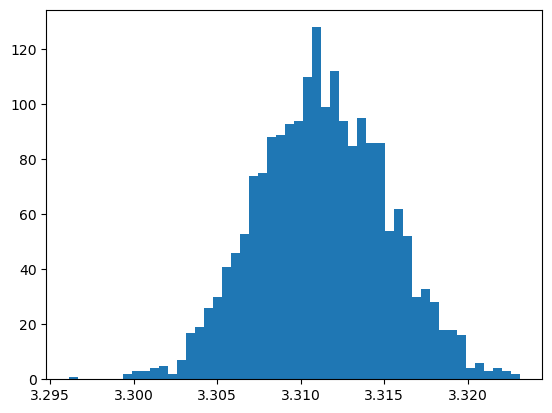

In [23]:
_=plt.hist(m, bins = 50)

Bootstrapping can also be used to estimate other statistics such as median or variance. 

In [24]:
def medBootstrap(X,numberb):
    x = [0]*numberb
    for i in range(numberb):
        sample = [X[_] for _ in np.random.randint(len(X), size=len(X))]
        x[i] = np.median(sample)
    return x

med = medBootstrap(wine['pH'], 1000)
print ("Median estimate:", np.mean(med))

Median estimate: 3.30923


## Method 2: Confidence Intervals 

A point estimate, such as a sample mean, provides a single plausible value for a parameter. However, as we have seen a point estimate is rarely perfect; usually there is some error in the estimate. That is why we have proposed to use the standard error as a measure of its variability.

As an alternative, a next logical step would be to provide a **plausible range of
values** for the parameter. A plausible range of values for the sample parameter
is called a **confidence interval**.

We will base the definition of confidence interval on two ideas:

+ Our point estimate is the most plausible value of the parameter, so it makes sense to build the confidence interval around the point estimate.

+ The plausability of a range of values can be defined from the sampling distribution of the estimate.

In order to define an interval, we can make use of a well
known result from probability that applies to normal distributions: 

* roughly 95% of the time our estimate will be within 1.96 standard errors of the true mean of the distribution.


**Details on Confidence Intervals**

The $100\cdot(1-\alpha)\%$ confidence interval for $\mu$ is,
$$ \bar{x} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}},$$
i.e, we use the point estimate for the mean, the $z$-score which determines the confidence interval, and the standard error of the mean.  Lets try and understand this formula by starting with the standard normal (using the $z$-score), and then transforming to the problem at hand.  Suppose we want the confidence level = $C\% = (1-\alpha)100 \%$.  Then
\begin{align}
C &= (1-\alpha)100 \\
&=P(-z_{\alpha/2} \le Z \le z_{\alpha/2}) \\
&= P(-z_{\alpha/2} \le \frac{\bar{x}-\mu}{\sigma/\sqrt{n}} \le z_{\alpha/2})\\
&= P\left(-z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \le (\bar{x}-\mu) \le z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\right)\\
&= P\left(-\bar{x}-z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \le -\mu \le -\bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\right)\\
&= P\left(\bar{x}+z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \ge \mu \ge \bar{x} - z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\right)\\
&= P\left(\bar{x}-z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \le \mu \le \bar{x} + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\right)\\
\end{align}

For our example, if we want a 95% confidence interval, this means $\alpha=0.05$, which (from a z-table) gives $z_{\alpha/2} = 1.96$.

In [25]:
alpha = 0.05
z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - se*z_alphadiv2, xbar + se*z_alphadiv2 ]
print ("We are", round(100*confidence,4), "% confident that the interval = ",  
       ci,  "contains the mean.")
z_alphadiv2

We are 95.0 % confident that the interval =  [3.2784211948917443, 3.3889121384415892] contains the mean.


1.959963984540054

Let's look more closely at this code in what it is doing.  First, we are looking at 95% confidence, thus setting `alpha` = 0.05.  We can use the `norm.ppf` function - the percent point function in `scipy`.   This call is equivalent to looking up in a textbook or other reference what the z-value is.  As suggested above for 95% confidence this should be ~1.96

In [26]:
print(norm.ppf(1-alpha/2))

1.959963984540054


Why do we use `alpha/2` in this call?  This is because we are looking a distribution with two tails (the spread in both directions). 

The variable `ci` holds the confidence intervals, the lower and upper value (or range) which should contain the mean. 

**WARNING**: what does this 95% confident mean? We cannot say that our specific sample has a 95% chance of containing the true parameter.    Rather, a correct interpretation is, if we were to take 100 samples and compute 100 confidence intervals, 95% of the confidence intervals are likely to contain the true mean of the population.  Lets explore and see:  

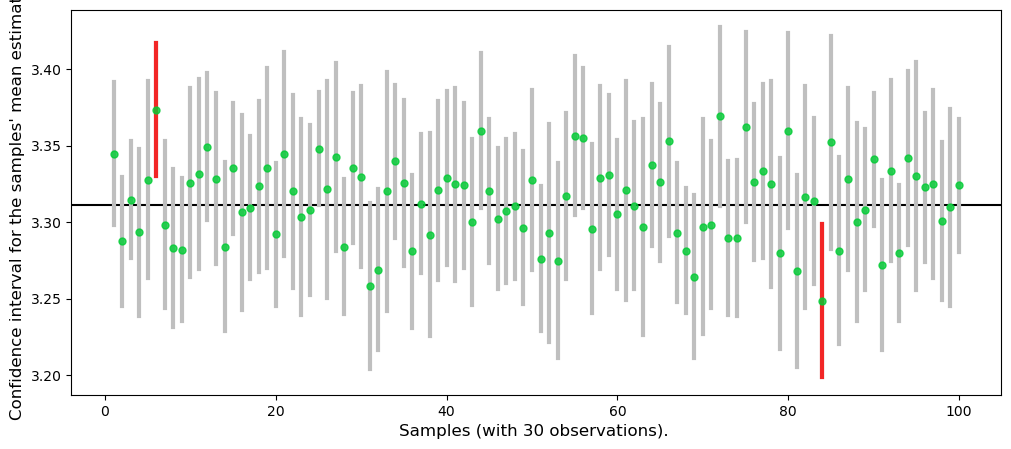

In [27]:
N_test = 100
n = 30
means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean
for i in range(N_test):
    observations = np.random.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
plt.show()

If the population standard deviation, $\sigma$, is unknown, then we need to estimate the population standard deviation.  Compare:
\begin{align}
  Z = \frac{\bar{x}-\mu}{\sigma/\sqrt{n}} \sim N(0,1)
\end{align}
and
\begin{align}
T = \frac{\bar{x}-\mu}{s/\sqrt{n}} \sim t(df = n-1)
\end{align}
Lets compare the $T$-distribution to the normal distribution.  

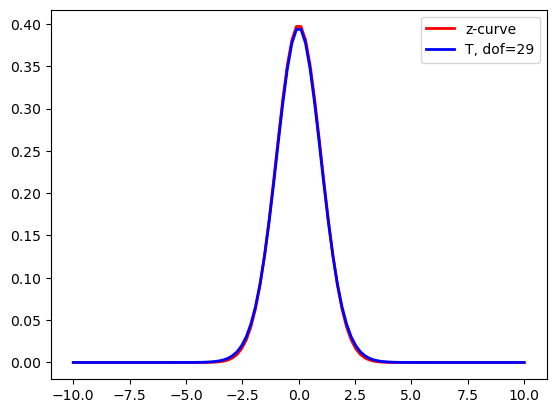

In [28]:
xmin = -10
xmax = 10
x = np.linspace(xmin,xmax,100)
p = norm.pdf(x, 0, 1)
_ = plt.plot(x, p, 'r', linewidth = 2,label="z-curve")
_ = plt.legend()

from scipy.stats import t
dof = 29;
q = t.pdf(x,dof)
_ = plt.plot(x, q, 'b', linewidth = 2,label="T, dof=%d"%(dof))
_ = plt.legend()

Like the normal distribution, the T-distribution is symmetric about the mean. However, it is shorter and wider than the Z-curve. It has an extra parameter (Degree of Freedom). In our case, the degree of freedom is one less than the number of observations. If the population standard deviation is not known (often the case), one should use the T-distribution rather than the normal distribution.

###  Exercise:

An engineer working for Ford is interested in the population of all vehicles that have an engine size of 3.0L or larger, and is particular interested in $\mu$, the highway mileage (mpg). Assume the population is normally distributed. The sample mean among a random sample of 14 vehicles is 18.3 mpg, and the sample standard deviation is 5.1 mpg (note: $\sigma$ is unknown). What is the 95% CI for $\mu$?

In [29]:
# Using the normal distribution, if the population standard deviation is known
alpha = 0.05
xbar = 18.3 
n = 14 
se = 5.1/np.sqrt(n)   # if 5.1 was population standard deviation 

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2) - norm.cdf(-z_alphadiv2)
ci = [xbar - se*z_alphadiv2, xbar + se*z_alphadiv2]
print ("We are", round(100*confidence,4), "% confident that the interval = ", 
       ci,  "contains the mean.")

We are 95.0 % confident that the interval =  [15.628505716079829, 20.971494283920173] contains the mean.


Because we have a sample standard deviation, we need to use t-distribution. 

In [30]:
# Using the t distribution, use the sample standard deviation
alpha = 0.05
xbar = 18.3
n = 14
dof = n-1
se = 5.1/np.sqrt(n) #  5.1 was the sample standard deviation

t_alphadiv2 = t.ppf(1-alpha/2,dof)
confidence = t.cdf(t_alphadiv2,dof)-t.cdf(-t_alphadiv2,dof)
ci = [xbar - se*t_alphadiv2, xbar + se*t_alphadiv2 ]
print ("We are", round(100*confidence,4), "% confident that the interval = ", 
       ci,  "contains the mean.")

We are 95.0 % confident that the interval =  [15.355347668416327, 21.244652331583676] contains the mean.


What if we are interested in tighter or looser bounds.  Then, we need to change alpha.  

In [31]:
alpha = 0.01
xbar = 18.3 
n = 14 
se = 5.1/np.sqrt(n)   # if 5.1 was population standard deviation 

z_alphadiv2 = t.ppf(1-alpha/2,dof)
confidence = t.cdf(z_alphadiv2,dof) - t.cdf(-z_alphadiv2,dof)
ci = [xbar - se*z_alphadiv2, xbar + se*z_alphadiv2]
print ("We are", 100*confidence, "% confident that the interval = ",  
       ci,  "contains the mean.")

We are 98.99999999902025 % confident that the interval =  [14.194170634339592, 22.40582936566041] contains the mean.


#### Z-estimates

We saw that a 95\% confidence interval has a z-value of 1.96. 

$$ CI = [\mu - se*1.96,  \mu + se*1.96] $$

To get other confidence intervals, we need to change the z-value (either as above) or using the following table. 

| Confidence Level | 90%  | 95%  | 99%  | 99.9% |
|------------------|------|------|------|-------|
| z-value          | 1.65 | 1.96 | 2.58 | 3.291 | 

## Hypothesis Testing 

Hypothesis: Statement to be tested.  Often, this is referred to as the null hypothesis, $H_0$.  The alternative hypothesis $H_a$ is, as the name suggests, the alternative to null hypothesis (if $H_0$ is not true, what do I suspect might be true instead?) 

There are two competing camps for hypothesis testing:
* Bayesian inference: a probability is assigned/computed for a hypothesis
* Frequentist approach: depends on likelihood of observed/unobserved data.

### Comment:
We will cover (as per the textbook) the frequentist approach, using frequentist measures like $p$-values and confidence intervals.  This has been the dominant approach to conducting hypothesis testing over the last two decades.  I do want to take a few minutes to talk about the Bayesian approach, since more recently, the Bayesian inference (MA 5770) has been garnering enthusiasm in fields like machine learning.  Bayesian inference uses the idea of conditional probability (e.g. P(A|B): probability that event A happens given event B) to determine which hypothesis is most probable.  One has to specify a prior distribution  about the probability distribution that represents the statistic one cares about.  To use Bayesian inference, one needs a full understanding of the statistical model.  Lets return to the frequentist approach for hypothesis testing.

### Five-Step Procedure
1. Formulate the appropriate hypothesis
2. Decide on an appropriate test statistic
3. Specify the critical region for the test statistics
4. Conduct the experiment and find the specific value for the test statistic
5. Reach an appropriate conclusion and state them.

### Hypothesis Testing Example 

Consider the following example: You inherit some
money, and you ask a friend who knows about the stock market to invest it for you.  One year later, all the money is gone.  

* The null hypothesis: your friend simply had an unlucky run of investments. It could have happened to anyone.
* The alternative hypothesis: your friend has cheated you.

Consider $H_a$ - cheat. Assume he's cheating you; what are the chances that he'd report a total loss of the money after one year? This is quite hard to answer: it depends on just how sophisticated a cheat he is.  

Consider $H_0$ - unlucky.  What are the chances that an honest investor would lose the money in the market as it's been over the last year? A more tractable question...

* You could ask some independent experts just how tough the
market has been that year.
* You could simulate a range of investment strategies using
historical market data
* You could look empirically at how many people out of the
wider population of investors lost all their money over the
last year

Using one or all of these methods, let's say you find that it's been a very tough year, and in fact there's a 50% chance of an honest investor having lost all their money.

It's therefore hard to rule out the null hypothesis. You're
forced to conclude something like "He may well be honest."

But let's say you find that it's been a great year, and that only 1 honest investor in 1000 lost money.

If you want to hang onto the null hypothesis (honesty) under
these circumstances, you have to accept that a very unlikely
thing has happened.

So because of the small probability of the observed data
(total loss) given the hypothesis (honesty) you are nudged
towards the conclusion that the alternative hypothesis
(cheating) is likely to be true.



### Understanding Hypothesis
A common example is drawn from the judicial system: innocent until proven guilty.  Here,
* $H_0$: defendant is innocent
* $H_a$: defendant is guilty

    
<table border=1px>
    <tr>
        <th>Defendant State</th>
        <th>Convict (reject $H_0$) </th>
        <th>Acquit (do not reject $H_0$)</th>
    </tr>
    <tr>
        <td>Innocent ($H_0$ is true)</td>
        <td>Type I error</td>
        <td> OK</td>
    </tr>
    <tr>
        <td>Guilty ($H_0$ is false)</td>
        <td>OK</td>
        <td>Type II error</td>
    </tr>
    </table>

* Type I error: mistake of rejecting the null hypothesis when it was in fact true.  The probability of committing a type I error is often denoted by $\alpha$ (note: overloaded use of variable $\alpha$).
* Type II error: mistake of failing to reject the null hypothesis when it is false.  The probability of committing a type II error is often denoted by $\beta$.

There are several common types of hypothesis:
1. Equal versus not equal hypothesis (a.k.a. two-tailed test)
    * $H_0$: parameter = some value (e.g. $H_0: \mu = 17$)
    * $H_a$: parameter $\neq$ some value (e.g. $H_a: \mu \neq 17$)
2. Equal versus greater than hypothesis (a.k.a. right-tailed test)
    * $H_0$: parameter = some value (e.g. $H_0: \mu = 17$)
    * $H_a$: parameter $>$ some value (e.g. $H_a: \mu > 17$)    
3. Equal versus less than hypothesis (a.k.a. left-tailed test)
    * $H_0$: parameter = some value (e.g. $H_0: \mu = 17$)
    * $H_a$: parameter $<$ some value (e.g. $H_a: \mu < 17$)   
    
### Test Statistic
Let $\mu_0$ be the nominal value for $\mu$, i.e., for the three types of hypothesis above:
1. $H_0: \mu = \mu_0$, $H_a: \mu \neq \mu_0$
2. $H_0: \mu = \mu_0$, $H_a: \mu > \mu_0$
3. $H_0: \mu = \mu_0$, $H_a: \mu < \mu_0$

If $\sigma$ (population standard deviation is known, use
$$ Z = \frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}} \sim N(0,1). $$
Otherwise, if $\sigma$ is not known, use
$$ T = \frac{\bar{x}-\mu_0}{s/\sqrt{n}} \sim t(df=n-1). $$

### Critical Regions
two-tail test ($H_0: \mu = \mu_0$, $H_a: \mu \neq \mu_0$):
<img src="https://pages.mtu.edu/~lebrown/un5550-f20/week3/two_tail.png">

left-tail test ($H_0: \mu = \mu_0$, $H_a: \mu < \mu_0$):
<img src="https://pages.mtu.edu/~lebrown/un5550-f20/week3/left_tail.png">

right-tail test ($H_0: \mu = \mu_0$, $H_a: \mu > \mu_0$):
<img src="https://pages.mtu.edu/~lebrown/un5550-f20/week3/right_tail.png">

### Conduct the experiment
Find the specific value of the test statistic.  Note:
* One should always complete the first three steps **before** any data is colected
* A well-planned experiment should have clear criteria for making decisions before the data collection, in order to ensure objectivity

### Conclusions
If the test statistic falls inside the critical region, we reject $H_0$
* We reject $H_0$ if we have **significant** evidence at level $\alpha$ that $H_0$ is false
* We do not reject $H_0$ if data is **NOT significant** at level $\alpha$.

Lets quantify this.  One often computes a $p$-value, the probability of observing the computed statistic if the null hypothesis is true.  The $p$-value measures, in some sense, how far into the tail we are, based on the computed statistic, i.e., how significant the observation is.  The closer the $p$-value is to zero, the more evidence we have against $H_0$.  We reject $H_0$ if $p$-value $< \alpha$.

### Example 

In the terms of our investment example, a statistical test is just a procedure for calculating p(loss | honesty) or its
equivalent.

The t-test is one such test.

We found above that if we take repeated
samples from a population, even of quite small size, the
distribution of the means of those samples quickly
approximates the bell curve of the normal distribution.

If we're dealing with big sample sizes, the distribution of the sample means is as close as makes no difference to being
the normal distribution.

But the match is not perfect for small samples though. This
is where the t-distribution comes in.

Let's say we have some kind of measure where the true
distribution is normal, with a mean of 100 and a standard
deviation of 10.

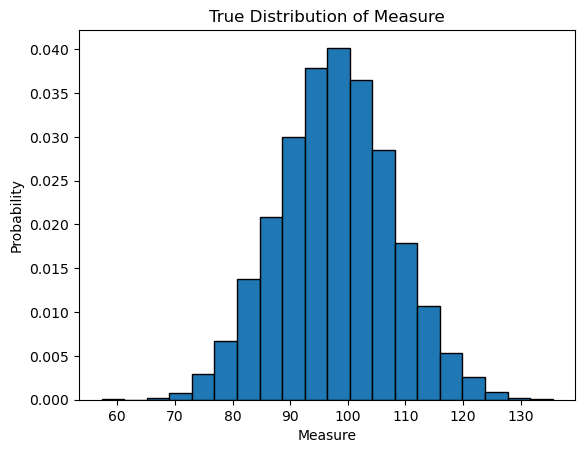

In [32]:
obs = rng.normal(100,10,10000)
plt.hist(obs, bins=20, align='left', edgecolor='black', density=True)
plt.xlabel('Measure')
plt.ylabel('Probability')
plt.title('True Distribution of Measure');

Let's look at a few small samples. 

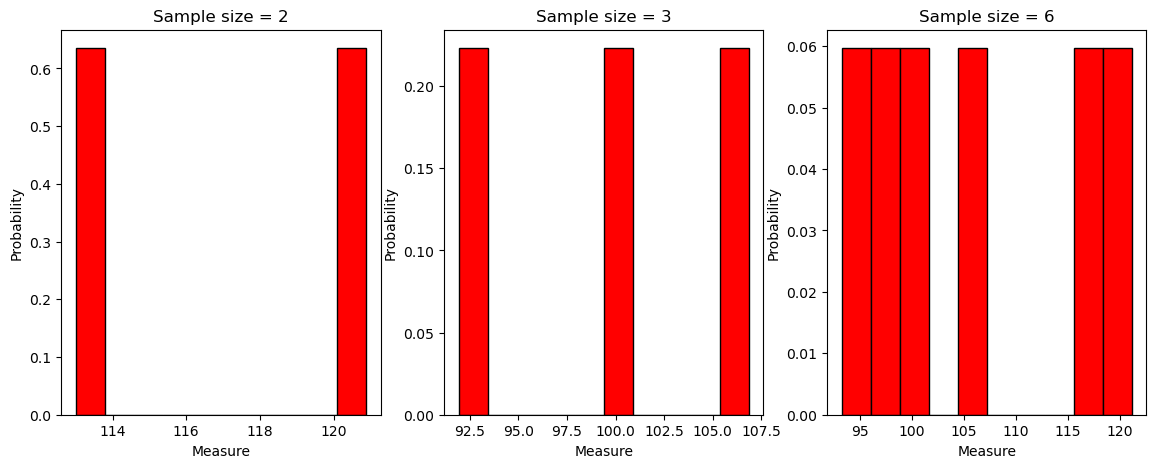

In [33]:
n1 = 2
n2 = 3
n3 = 6
obs1 = rng.normal(100, 10, n1)
obs2 = rng.normal(100, 10, n2)
obs3 = rng.normal(100, 10, n3)
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.hist(obs1, color='red',
         align='left', edgecolor='black', density=True)
plt.xlabel('Measure')
plt.ylabel('Probability');
plt.title('Sample size = 2')
plt.subplot(1,3,2)
plt.hist(obs2,  color='red',
         align='left', edgecolor='black', density=True)
plt.xlabel('Measure')
plt.ylabel('Probability');
plt.title('Sample size = 3');
plt.subplot(1,3,3)
plt.hist(obs3,  color='red',
         align='left', edgecolor='black', density=True)
plt.xlabel('Measure')
plt.ylabel('Probability');
plt.title('Sample size = 6');

In [34]:
print("Mean of 2- Sample:  %.3f" % obs1.mean())
print("Mean of 3- Sample:  %.3f" % obs2.mean())
print("Mean of 6- Sample:  %.3f" % obs3.mean())


Mean of 2- Sample:  117.335
Mean of 3- Sample:  100.268
Mean of 6- Sample:  106.907


What are we doing when we take a sample of size N and
calculate the mean?

We know that there's a "meta-distribution" that describes the mean and standard deviations of the sample means. (Think
of the green histograms.)

The mean of this meta-distribution is the original population mean, and the standard deviation is the population standard deviation divided by the square root of the sample size (i.e., the standard error).

So when we calculate the mean of one sample, we are
drawing a random variate from this meta-distribution.



In [35]:
N_tests = 10000
n = 2
means1 = [0] * N_tests
for i in range(N_tests):
    obs = rng.normal(100,10,n)
    means1[i] = obs.mean()
    # print ("Sample " + str(i) + ", Mean: ", '%.2f' % means[i])
print("Mean of Sample Means: %.3f" % np.mean(means1))
n = 3
means2 = [0] * N_tests
for i in range(N_tests):
    obs = rng.normal(100,10,n)
    means2[i] = obs.mean()
    # print ("Sample " + str(i) + ", Mean: ", '%.2f' % means[i])
print("Mean of Sample Means: %.3f" % np.mean(means2))
n = 6
means3 = [0] * N_tests
for i in range(N_tests):
    obs = rng.normal(100,10,n)
    means3[i] = obs.mean()
    # print ("Sample " + str(i) + ", Mean: ", '%.2f' % means[i])
print("Mean of Sample Means: %.3f" % np.mean(means3))

Mean of Sample Means: 99.869
Mean of Sample Means: 99.960
Mean of Sample Means: 100.043


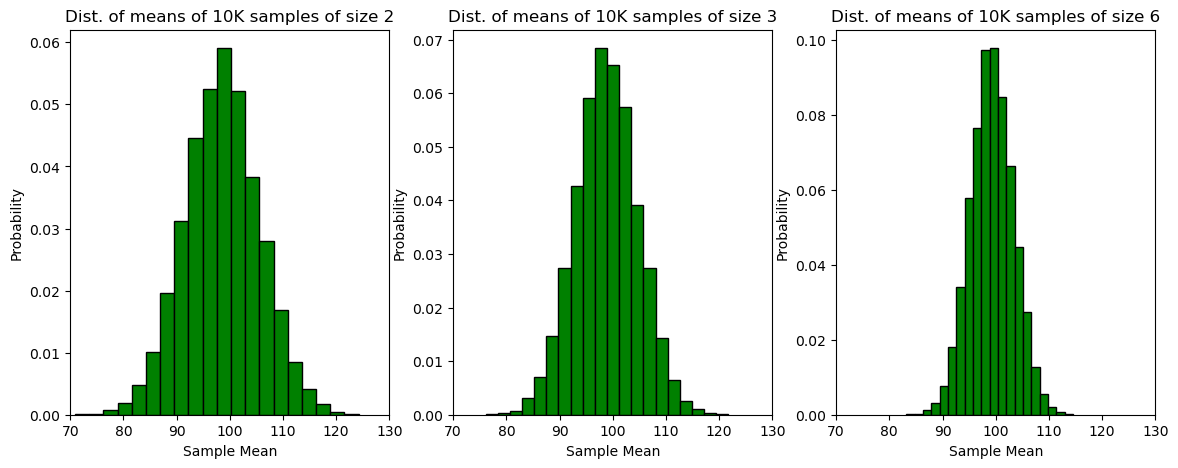

In [36]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.hist(means1, color='green', bins=20,
         align='left', edgecolor='black', density=True)
plt.xlim(70,130)
plt.xlabel('Sample Mean')
plt.ylabel('Probability');
plt.title('Dist. of means of 10K samples of size 2')
plt.subplot(1,3,2)
plt.hist(means2,  color='green', bins=20,
         align='left', edgecolor='black', density=True)
plt.xlim(70,130)
plt.xlabel('Sample Mean')
plt.ylabel('Probability');
plt.title('Dist. of means of 10K samples of size 3');
plt.subplot(1,3,3)
plt.hist(means3,  color='green', bins=20,
         align='left', edgecolor='black', density=True)
plt.xlim(70,130)
plt.xlabel('Sample Mean')
plt.ylabel('Probability');
plt.title('Dist. of means of 10K samples of size 6');


This distribution of the sample means "tightens up" as the
sample size gets bigger. We've seen this before.

We can characterize this meta-distribution in terms of its
own mean and standard deviation, although of course we
need to estimate those from our sample in real situations.

Calculating the mean of a sample equates to drawing one
variate from the meta-distribution.

Therefore we can ask how often we're likely to see extreme
values of the sample mean, i.e., values that lie in the tails of the meta-distribution.

**How to calculate the probability of extreme sample means?**

If our sample size was big enough, we could use the normal
distribution to make this calculation.

We would ask how many standard deviations away from the
overall mean our particular sample mean was: this is called
a Z-score if the distribution is normal.

In our case we're going to calculate basically the same thing and call it a t-score because we can't assume normality.

**Calculating a t-score** 

We want to know how many standard deviations away from
the overall mean of the sampling distribution our one
particular sample is.

Let's flesh out the example: we take our measurement scheme
to a new country, and we want to know whether the people
here are any different than they were at home.

This gives us our null and alternative hypotheses:

* The null hypothesis is that there's no difference in the measures between the two countries: the mean is 100 in both
cases. 
* Our alternative hypothesis is simply the converse, that there is some difference in measures between the countries.

Note, that we usually don't have a commitment about
whether the difference, if there is one, will be positive or
negative.

$H_0$: $\mu = 100$ 


We collect a sample of 6 people, and collect measures.

They score: 101, 112, 100, 107, 94, 104.

We can look at the mean and standard deviation. 







In [37]:
meas = [101, 112, 100, 107, 94, 104]
print("Means of samples:   %.3f" % np.mean(meas))
print("Std dev of samples: %.3f" % np.std(meas)) 

Means of samples:   103.000
Std dev of samples: 5.657


But we don't want the plain SD, we want the sample
standard deviation (division by N-1) because we're trying to
estimate the population standard deviation.



In [38]:
print("Sample std dev of samples: %.3f" % np.std(meas, ddof=1))

Sample std dev of samples: 6.197


In [39]:
se = np.std(meas, ddof=1)/np.sqrt(n)
print("Standard error :  %.3f" % se)

Standard error :  2.530


We now have our best guess at the meta-distribution of the
sample-of-size-six means: in the absence of any other
information, we'd say that its mean is 103 and its standard
deviation is 2.53.

However, our null hypothesis is that our six numbers come
from a distribution with a mean of 100, i.e., the same as
back home.

--- 

We might have helped ourselves to the assumption that the
standard deviation of the measures in this new country is 10, the same as at home. But we're not going to do that: who is to
say that measures doesn't have a different spread here?

So our null hypothesis says: let's imagine that our sample
mean comes from a distribution of sample means with mean
of 100 and standard deviation of 2.53

This gives us our t-statistic: $ t = \frac{\bar{x}-\mu_0}{s/\sqrt{n}} $

So a t-score is a lot like a z-score: it's essentially measuring the number of standard deviations from an expected mean that some measurement is.

In our case, the t-score is (103 - 100) / 2.53 = 1.18.

That's not a great distance from the mean: recall the 1.96
threshold for z-scores that equates to the most extreme 5%
of the distribution.

Similarly, it turns out that a t-score of ±1.18, or a more
extreme value, happens 28.9% of the time (this is our pvalue). So we're not motivated to reject $H_0$.

#### p-values 

In the old days you would look up a table of critical p-values for the t-distribution with an appropriate number of degrees of freedom.

Degrees of freedom come up a lot in statistics. It's just a
measure of how many free parameters something has. For
one-sample t-tests, the degrees of freedom are N-1, where
N is the sample size. This is because to get a particular
value of t, the last score in the sample is not free to vary.

We need to specify whether we're interested in a one-tailed
or a two-tailed test. 

A two-tailed test is the default option. This means that we
have no strong commitment on whether the sample mean is
likely to be higher or lower than the mean specified in the
null hypothesis. Thus we include both extreme tails of the
distribution when figuring out our p-value.

If for some reason we only cared about evidence for an
alternative hypothesis that the mean score was (e.g.) higher, we could use a one-tailed test and look at only one side of the t-distribution in figuring out p.

Here we can make use of the `scipy` module, in particular the [`ttest_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) function. 






In [40]:
import scipy
scipy.stats.ttest_1samp(meas, 100)

TtestResult(statistic=1.1858541225631423, pvalue=0.28895719913967916, df=5)

### Exercise: Red Wine 

Let's go back to the pH or our red wines.  First, recompute the population mean and standard deviation. 

In [41]:
mu = wine["pH"].mean()
sigma = wine["pH"].std()
print ("mean = %0.3f, sigma = %0.4f" % (mu, sigma))

mean = 3.311, sigma = 0.1544


Suppose now, we want to take a sample of 30 wines. Suppose that our hypothesis is that the mean is 3.1. The alternative hypothesis, is that the mean is different from 3.1 (i.e., a two-tail test). Lets sample the population and compute the p-value.

In [42]:
n = 30
obs = np.random.choice(wine.index.values,n)
sampled_wines = wine.loc[obs]
xbar = sampled_wines["pH"].mean()
print ("Sample mean = %.3f" % xbar)
tval = (xbar - 3.1) / (sigma/np.sqrt(n))
print("Tstat = %.3f" % tval)

alpha = 0.05
pvalue = 2*(1-t.cdf(np.abs(tval), n-1)) 
# note: the factor of 2 is here because of the two-tailed test

print("The p-value is %0.8f"%(pvalue))


if (pvalue < alpha):
    print ("We reject the null hypothesis")
else:
    print ("We have no evidence to reject the null hypothesis")
    
    

Sample mean = 3.272
Tstat = 6.102
The p-value is 0.00000120
We reject the null hypothesis


There are convenient relationships between confidence intervals and hypothesis testing. 
* Sometimes, we compute a CI for $\mu$ after rejecting $H_0$ to report the location of plausible values for $\mu$.
* A two-sided hypothesis test with a significance level of $\alpha$ is
equivalent to constructing a $(1- \alpha)100\%$ confidence interval for $\mu$.
* We can check whether the CI contains $\mu_0$:
    * If the interval does contain $\mu_0$, then we fail to reject $H_0$.
    * If the interval does not contain $\mu_0$, then we reject $H_0$.

### Other tests 

The one-sample t-test is what we've covered so far.

The one-sample test can be used to deal with simple
experimental designs in which we measure something
before and after an intervention. For example, does drug X
lower blood pressure, or does diet Y lead to weight loss?

* For each case in the study, we subtract the "before" score
from the "after" score to get a difference
* We can then examine the null hypothesis that the mean of
the differences is zero, i.e., that the intervention makes no difference. 

#### Two-sample t-test 


The two-sample t-test is an extension of the same idea.

It is used to test the null hypothesis that two different
samples in an experiment are drawn from the same
population, i.e., that they have the same mean.

For example, does drug A work any better or worse than
drug B in reducing blood pressure? Do men and women
systematically differ on their measurements?

There are some mathematical complications based on
whether or not the sample sizes are the same and whether
or not we can assume equal variances across the two
samples.